### Disclaimer

Distribution authorized to U.S. Government agencies and their contractors. Other requests for this document shall be referred to the MIT Lincoln Laboratory Technology Office.

This material is based upon work supported by the Under Secretary of Defense for Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions, findings, conclusions or recommendations expressed in this material are those of the author(s) and do not necessarily reflect the views of the Under Secretary of Defense for Research and Engineering.

© 2019 Massachusetts Institute of Technology.

The software/firmware is provided to you on an As-Is basis

Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part 252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed above. Use of this work other than as specifically authorized by the U.S. Government may violate any copyrights that exist in this work.


In [1]:
from tesse.msgs import *
from tesse.env import Env

import time
import matplotlib.pyplot as plt

In [2]:
# port that the simulation is listening on
request_port = 9000
receive_port = 9001

# ip address of the simulation
simulation_ip = "172.26.145.7"
own_ip = "172.26.145.7"

In [3]:
env = Env(simulation_ip, own_ip, request_port, receive_port)

### Demo Transform Message

In [7]:
env.send(Transform(-1, 0, 0)) # left
time.sleep(1)
env.send(Transform(1, 0, 0)) # right
time.sleep(1)
env.send(Transform(0, -1, 0)) # back
time.sleep(1)
env.send(Transform(0, 1, 0)) # forward
time.sleep(1)
env.send(Transform(0, 0, 45)) # turn right
time.sleep(1)
env.send(Transform(0, 0, -45)) # turn left

### Demo Force and Torque Message

In [8]:
env.send(AddRelativeForceAndTorque(100, 0)) # Forward force
time.sleep(1)
env.send(AddRelativeForceAndTorque(-100, 0)) # Backward force
time.sleep(1)
env.send(AddRelativeForceAndTorque(0, 10)) # Torque right
time.sleep(1)
env.send(AddRelativeForceAndTorque(0, -10)) # Torque left

### Demo getting images

In [9]:
def plot(data_response):
    imgs = data_response.images
    if( len(imgs) > 1 ):
        fig, ax = plt.subplots(1,len(imgs),figsize=(15,10))
        for i in range(len(imgs)):
            ax[i].axis('off')
            ax[i].imshow(imgs[i])
    else:
        plt.imshow(imgs[0])
        plt.axis('off')

    plt.show()

<TESSE Agent Metadata v0.1>
  <position x='-1.532613/' y='-4.651242' z='30.08464'/>
  <quaternion x='0/' y='0.5706124' z='0' w='-0.8212194'/>
  <velocity x_dot='3.954512E-06/' y_dot='-0.005467897' z_dot='-0.0003870355'/>
  <angular velocity x_ang_dot='0/' y_ang_dot='-0.0104139' z_ang_dot ='0'/>
  <acceleration x_ddot='-8.483039E-06/' y_ddot='-0.2477948' z_ddot='0.0004029484'/>
  <angular acceleration x_ang_ddot='0/' y_ang_ddot='0.0108433' z_ang_ddot='0'/>
  <time>35.75098</time>
  <collision status='true' name='Bench (10)'/>
</TESSE Agent Metadata v0.1>



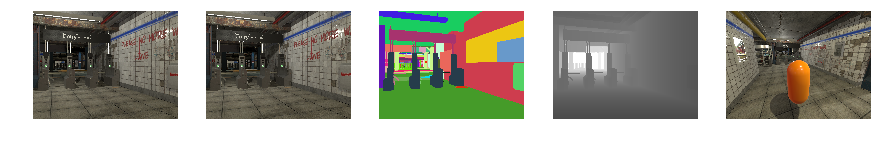

In [10]:
data_response = env.request(DataRequest())
print(data_response.data)
plot(data_response)

<TESSE Agent Metadata v0.1>
  <position x='-1.532263/' y='-4.650934' z='30.08455'/>
  <quaternion x='0/' y='0.5747144' z='0' w='-0.8183541'/>
  <velocity x_dot='1.578655E-09/' y_dot='0.002993658' z_dot='-7.531125E-06'/>
  <angular velocity x_ang_dot='0/' y_ang_dot='-0.0002026281' z_ang_dot ='0'/>
  <acceleration x_ddot='-3.274181E-09/' y_ddot='-0.2525554' z_ddot='7.841618E-06'/>
  <angular acceleration x_ang_ddot='0/' y_ang_ddot='0.0002109831' z_ang_ddot='0'/>
  <time>39.6433</time>
  <collision status='false' name=''/>
</TESSE Agent Metadata v0.1>



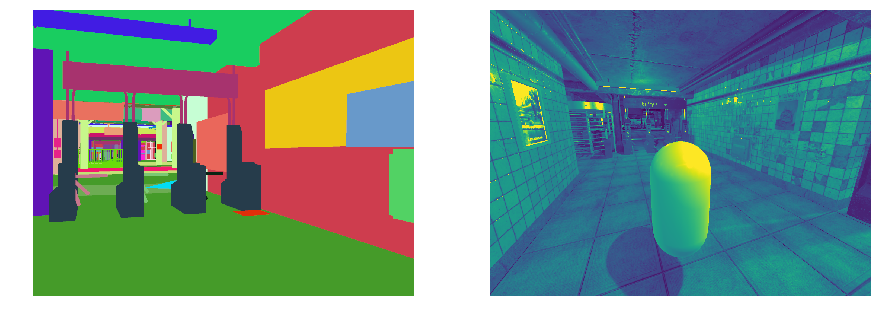

In [11]:
data_response = env.request(DataRequest(cameras=[(Camera.SEGMENTATION, Compression.OFF, Channels.THREE),
                                                 (Camera.THIRD_PERSON, Compression.OFF, Channels.SINGLE)]))
print(data_response.data)
plot(data_response)

### Metadata and Camera request

In [12]:
print("Metadata is:\n", env.request(MetadataRequest()))
print("Camera information is:\n", env.request(CameraInformationRequest()))

Metadata is:
 <TESSE Agent Metadata v0.1>
  <position x='-1.532258/' y='-4.650753' z='30.08455'/>
  <quaternion x='0/' y='0.5747945' z='0' w='-0.8182978'/>
  <velocity x_dot='1.79412E-12/' y_dot='-0.002640043' z_dot='-1.272123E-07'/>
  <angular velocity x_ang_dot='0/' y_ang_dot='-3.4227E-06' z_ang_dot ='0'/>
  <acceleration x_ddot='-2.131628E-12/' y_ddot='0.3041242' z_ddot='1.32458E-07'/>
  <angular acceleration x_ang_ddot='0/' y_ang_ddot='3.563821E-06' z_ang_ddot='0'/>
  <time>43.69944</time>
  <collision status='false' name=''/>
</TESSE Agent Metadata v0.1>

Camera information is:
 <camera_info>
  <name>rgb_left</name>
  <id>0</id>
  <parameters height='768' width='1024'fov='37.84929'/>
  <position x='-0.05' y='0' z='0'/>
  <rotation x='0' y='0' z='0' w='1'/>
</camera_info>
<camera_info>
  <name>rgb_right</name>
  <id>1</id>
  <parameters height='768' width='1024'fov='37.84929'/>
  <position x='0.05' y='0' z='0'/>
  <rotation x='0' y='0' z='0' w='1'/>
</camera_info>
<camera_info>
  <

### Demonstrate some camera manipulation

In [14]:
# Reset 3rd person view to default
env.request(SetCameraParametersRequest(768, 1024, 90, Camera.THIRD_PERSON))
env.request(SetCameraPositionRequest(0, 1.319, -2.258, Camera.THIRD_PERSON))
initial = env.request(DataRequest(cameras=[(Camera.THIRD_PERSON, Compression.OFF, Channels.THREE)]))

# Change the parameters and get the camera
env.request(SetCameraParametersRequest(768, 1024, 55, Camera.THIRD_PERSON))
parameters_changed = env.request(DataRequest(cameras=[(Camera.THIRD_PERSON, Compression.OFF, Channels.THREE)]))

# Change the position and get the camera
env.request(SetCameraPositionRequest(0, 3, -5.5, Camera.THIRD_PERSON))
position_changed = env.request(DataRequest(cameras=[(Camera.THIRD_PERSON, Compression.OFF, Channels.THREE)]))


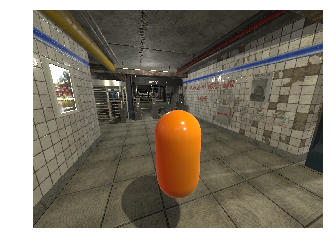

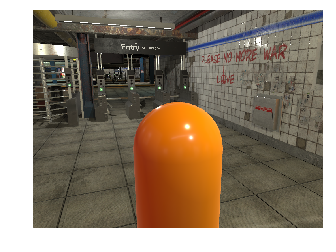

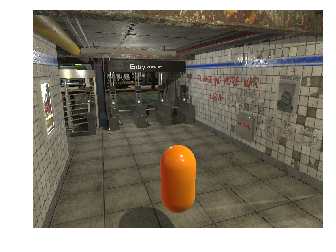

In [15]:
plot(initial)
plot(parameters_changed)
plot(position_changed)

### Demo respawning

*NOTE: I wasn't able to test this*

In [ ]:
for i in range(6):
    env.send(Respawn())
    time.sleep(1)

### Demo changing scenes

*NOTE: I wasn't able to test this*

In [ ]:
for i in range(4):
    print(env.request(SceneRequest(i)))
    time.sleep(2)